### Predicting Survival in the Titanic Data Set We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

### Import Necessary Libraries

In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

>You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [5]:
# Dropping the unnnecessary columns....
titanic.drop(columns=['PassengerId', 'Name','Ticket','Cabin','Embarked'],inplace=True,axis=1)


In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [9]:
# Rmoving the null of the column values

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [10]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [11]:
gender = {'male': 1,'female': 0} 
titanic.Sex = [gender[item] for item in titanic.Sex] 

#titanic.Sex[titanic.Sex == 'male'] = 1
#titanic.Sex[titanic.Sex == 'female'] = 0

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [15]:
#let's first visualize the tree on the data without doing any pre processing

# This shows that how our tree was created: using gini 
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
[1, 0]


In [17]:
clf.score(x_train,y_train)

0.985553772070626

In [18]:
py_pred = clf.predict(x_test)

In [19]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7313432835820896

## Lets check if the accuracy increases with hyperparameter Tuning

In [20]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [21]:
# clf in name of the model n_jobs=-1 (it takes all the powers of CPU)
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [22]:
grid_search.fit(x_train,y_train)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [23]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}


In [24]:
grid_search.best_score_

0.826645264847512

In [25]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =12, min_samples_leaf= 3, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [26]:
clf.score(x_test,y_test)

0.7574626865671642

As we can see with hyperparameter Tuning the accuracy has increased from 75% to 77 %

### Import Necessary Libraries

In [27]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visulization

In [30]:
### lets see how sex is related with Survied and non Survived.

In [31]:
titanic["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
titanic["Sex"][titanic["Sex"] == 'female']      

1      female
2      female
3      female
8      female
9      female
        ...  
880    female
882    female
885    female
887    female
888    female
Name: Sex, Length: 314, dtype: object

In [33]:
titanic["Survived"][titanic["Sex"] == 'female']

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [34]:
titanic["Survived"][titanic["Sex"] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [37]:
titanic["Survived"][titanic["Sex"] == 'female'].value_counts( normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


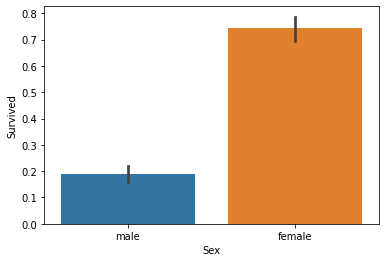

In [38]:
import seaborn as sns
#draw a bar plot of survival by Pclass
sns.barplot(x="Sex", y="Survived", data=titanic)

print("Percentage of females who survived:", titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Hence female has more survival rate than male

In [39]:
### Lets see how Pclass is related with Survived.

In [40]:
titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


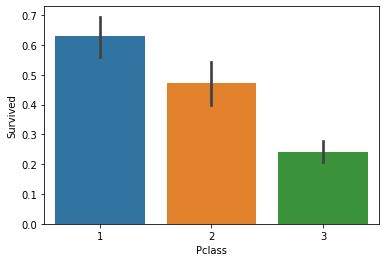

In [41]:
import seaborn as sns
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=titanic)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### Hence Pclass=1 has higher survival rate than people in other class

In [42]:
 ### Lets see how Pclass is related with SibSp (Siblings aboard).

In [43]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


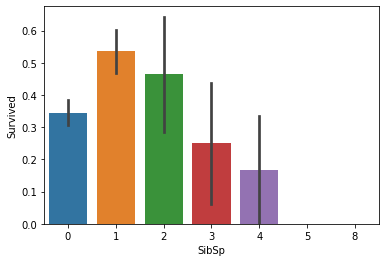

In [44]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=titanic)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", titanic["Survived"][titanic["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", titanic["Survived"][titanic["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", titanic["Survived"][titanic["SibSp"] == 2].value_counts(normalize = True)[1]*100)

### In general, it's clear that people with more siblings or spouses aboard were less likely to survive. 
### However, contrary to expectations, people with no siblings or spouses were 
### less to likely to survive than those with one or two



###  Parch (Parents/children aboard)

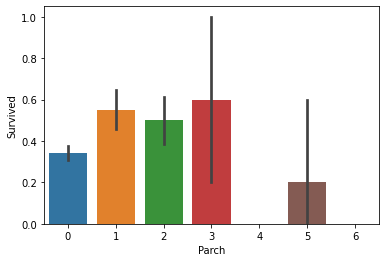

In [45]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=titanic)


People with less than four parents or 
children aboard are more likely to survive than those with four or more. 
Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

### Lets have a relationship between age and survival


In [48]:
import numpy as np
np.inf # Represents infinity

inf

In [49]:
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
titanic['AgeGroup']=pd.cut(titanic["Age"], bins, labels = labels)
print(titanic['AgeGroup'])

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888            NaN
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]


In [50]:
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),3, labels=["bad", "medium", "good"])

[bad, good, medium, medium, good, bad]
Categories (3, object): [bad < medium < good]

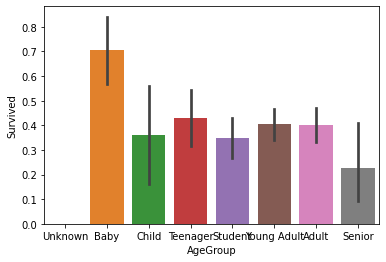

In [51]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic)

### Babies are more likely to survive than any other age group.

In [52]:
titanic["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [53]:
#Return a boolean same-sized object indicating if the values are not NA.
#Non-missing values get mapped to True. Characters such as empty
#strings ``''`` or :attr:`numpy.inf` are not considered NA values

titanic["Cabin"].notnull()

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [54]:
titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))

In [55]:
titanic["CabinBool"].head()

0    0
1    1
2    0
3    1
4    0
Name: CabinBool, dtype: int32

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


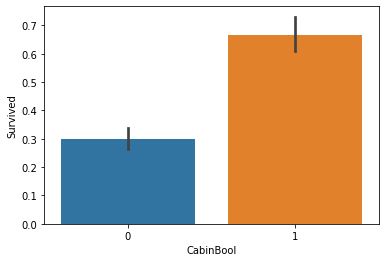

In [56]:
sns.barplot(x="CabinBool", y="Survived", data=titanic)

print("Percentage of CabinBool = 1 who survived:", titanic["Survived"][titanic["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", titanic["Survived"][titanic["CabinBool"] == 0].value_counts(normalize = True)[1]*100)



## Data Cleaning

In [57]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
CabinBool        0
dtype: int64

>You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [58]:
# Dropping the unnnecessary columns....
titanic.drop(columns=['PassengerId', 'Name','Ticket','Cabin','Embarked','AgeGroup'],inplace=True,axis=1)



In [59]:
titanic.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
CabinBool      0
dtype: int64

In [60]:
# Rmoving the null of the column values

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [61]:
titanic.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
CabinBool    0
dtype: int64

In [62]:
gender = {'male': 1,'female': 0} 
titanic.Sex = [gender[item] for item in titanic.Sex] 

In [63]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [65]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

# This shows that how our tree was created: using gini 
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


feature_name=list(X.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)


clf.score(x_train,y_train)
py_pred = clf.predict(x_test)

# accuracy of our classification tree
clf.score(x_test,y_test)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinBool']
[1, 0]


0.7686567164179104